# Calculate annual number of heatwaves in UTCI data 

## Data

In [150]:
import iris

In [2]:
%%time
fname = "data/UKCP/utci_regional/utci10max_rcp85_land-cpm_uk_london_01-15_day_19801201-20801130.nc"
utci = iris.load_cube(fname)
utci.summary(shorten=True)

CPU times: user 230 ms, sys: 22.7 ms, total: 253 ms
Wall time: 344 ms


'utci class 10 / (1)                 (ensemble_member: 12; time: 21600)'

In [3]:
utci.data

masked_array(
  data=[[4., 4., 4., ..., 5., 5., 5.],
        [5., 5., 4., ..., 5., 5., 5.],
        [4., 5., 5., ..., 5., 5., 4.],
        ...,
        [4., 4., 4., ..., 5., 5., 5.],
        [5., 4., 4., ..., 4., 5., 5.],
        [4., 5., 4., ..., 5., 5., 6.]],
  mask=False,
  fill_value=1e+20)

In [4]:
utci_hot = utci.aggregated_by("year", iris.analysis.COUNT, function=lambda value: value>6)
utci_mod = utci.aggregated_by("year", iris.analysis.COUNT, function=lambda value: value==7)
utci_str = utci.aggregated_by("year", iris.analysis.COUNT, function=lambda value: value==8)
utci_vst = utci.aggregated_by("year", iris.analysis.COUNT, function=lambda value: value==9)
utci_ext = utci.aggregated_by("year", iris.analysis.COUNT, function=lambda value: value==10)

utci_hot.rename("Annual Heat Stress Days (Daytime)")
utci_mod.rename("Annual Moderate Heat Stress Days (Daytime)")
utci_str.rename("Annual Strong Heat Stress Days (Daytime)")
utci_vst.rename("Annual Very Strong Heat Stress Days (Daytime)")
utci_ext.rename("Annual Extreme Heat Stress Days (Daytime)")

In [121]:
utci_hot

Annual Heat Stress Days (Daytime) (1),ensemble_member,time
Shape,12,63
Dimension coordinates,,
ensemble_member,x,-
time,-,x
Auxiliary coordinates,,
ensemble_member_id,x,-
month_number,-,x
year,-,x
yyyymmdd,-,x
Scalar coordinates,,


## Scatter Plot

In [7]:
import iris.quickplot as qplt
import iris.plot as iplt
import matplotlib.pyplot as plt

In [8]:
def plot_ensemble(cube, dim_name="ensemble_member"):
    es, = cube.coord(dim_name).shape
    for i in range(0, es):
        qplt.plot(cube[i], 'o', alpha=0.2)

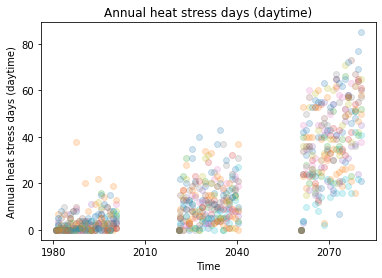

In [9]:
plot_ensemble(utci_hot)

## Box plot

In [102]:
def boxplot_annual(cube, years, title=""):
    xs = []
    ls = []
    for y in range(*years):
        x=cube.extract(iris.Constraint(year=y)).data
        xs.append(x)
        ls.append(y)
    plt.boxplot(xs, labels=ls)
    plt.title(f"{title} {ls[0]}-{ls[-1]}")
    plt.ylim((0,100))
    plt.ylabel("Number of days")
    plt.xlabel("Year")
    plt.setp(plt.gca().get_xticklabels()[::2], visible=False)
    plt.grid(axis='y')
    plt.show()

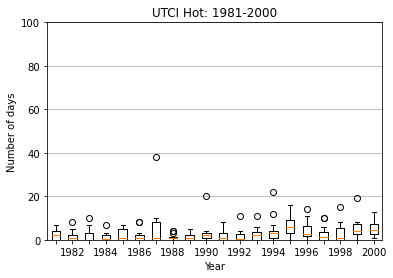

In [104]:
boxplot_annual(utci_hot, (1981, 2001), title="UTCI Hot:")

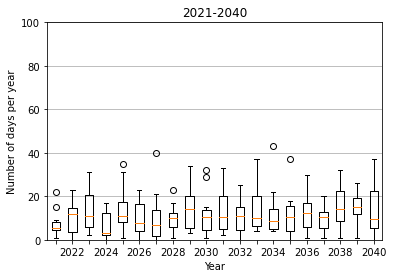

In [90]:
boxplot_annual(utci_hot, (2021, 2041))

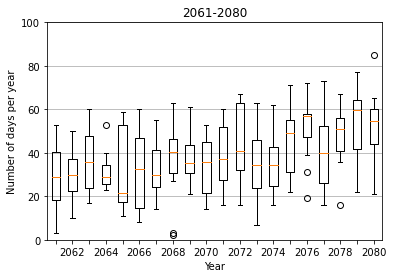

In [91]:
boxplot_annual(utci_hot, (2061, 2081))

## Decadal boxplots

In [146]:
def boxplot_decadal(cube, years, title="", ylim=100):
    xss = []
    ls = []
    for d in years:
        xs = []
        for y in range(d+1, d+11):
            x=cube.extract(iris.Constraint(year=y)).data
            xs.extend(x)
        xss.append(xs)
        ls.append(f"{d}s")
    plt.boxplot(xss, labels=ls)
    plt.title(f"{title} {ls[0]}-{ls[-1]}")
    plt.xlabel("Decade")
    plt.ylabel("Number of days per year")
    plt.ylim((0,ylim))
    plt.grid(axis='y')
    plt.show()

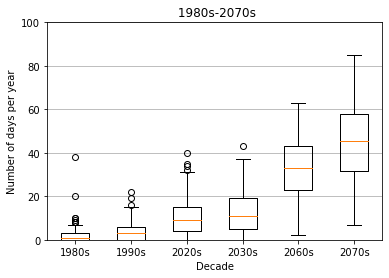

In [144]:
boxplot_decadal(utci_hot, (1980, 1990, 2020, 2030, 2060, 2070))

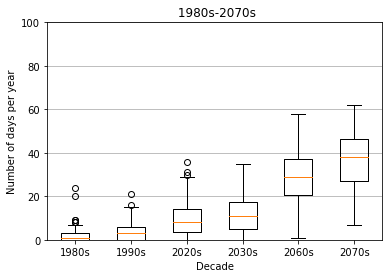

In [145]:
boxplot_decadal(utci_mod, (1980, 1990, 2020, 2030, 2060, 2070))

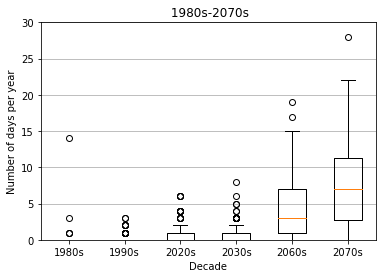

In [149]:
boxplot_decadal(utci_str, (1980, 1990, 2020, 2030, 2060, 2070), ylim=30)